# Метрики качества классификации

## 1. Данные

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X = pd.read_pickle('data/shelter/xtrain.pkl')
y = pd.read_csv('data/shelter/train.csv')['OutcomeType']

для учебных примеров оставим только 2 класса, отличающихся значительно и по смыслу, и по размеру

In [4]:
y.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [5]:
is_first_2_class = (y=='Adoption')|(y=='Euthanasia')

In [6]:
X = X[is_first_2_class]
X.index = range(len(X))
y = y[is_first_2_class]
y.index = range(len(y))

y теперь можно перевести в множество {0,1}

In [7]:
y = (y=='Adoption').astype(int)

для оценки качества разобьём выборки на 2 части, 3:1

In [8]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.25)

-----

## 2. Обучим классификатор

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier(max_depth=5)

In [11]:
clf.fit(Xtr, ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
yval_pred = clf.predict(Xval)
yval_pred_proba = clf.predict_proba(Xval)

-----

## 3. Написание метрик с нуля

In [13]:
from sklearn import metrics

-----

In [14]:
metrics.confusion_matrix(yval, yval_pred)

array([[ 242,  150],
       [  16, 2673]])

In [15]:
metrics.accuracy_score(yval, yval_pred)

0.9461213891593638

In [16]:
metrics.precision_score(yval, yval_pred)

0.946865037194474

In [17]:
metrics.recall_score(yval, yval_pred)

0.9940498326515433

In [18]:
metrics.roc_auc_score(yval, yval_pred_proba[:,1])

0.919442209758578

In [19]:
metrics.average_precision_score(yval, yval_pred_proba[:,1])

0.9802222945674902

## Реализовать самостоятельно вывод графика ROC-AUC

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [118]:
def calculate_tpr_and_fpr(y_true, y_pred_probas, alpha):

    ## 1. Отнесите  наблюдения к одному  из нескольких классов в зависимости от порога
    ## 2. Посчитайте tpr и fpr
    
    y_pred = (y_pred_probas > alpha).astype(int)
    
    fp = 0
    tp = 0
    fn = 0
    tn = 0
    
    for i in range(len(y_pred)):
        if y_pred[i] == 1:
            if y_true[i] == 1:
                tp += 1
            else: 
                fp += 1
        elif y_true[i] == 0:
            tn += 1
        else:
            fn += 1
    
    fpr = fp / (fp + tn)

    tpr = tp / (tp + fn )
    
#     print('hi', 'i am tpr', tpr)
#     print('hi', 'i am fpr', fpr)
    return tpr, fpr

In [119]:
def roc_auc_plot(y_true, y_pred_probas):
    alphas = np.arange(0, 1, 0.001)
    tprs, fprs = [], []
    for a in alphas:
        tpr, fpr = calculate_tpr_and_fpr(y_true, y_pred_probas, a)
        tprs.append(tpr)
        fprs.append(fpr)
#         print(fpr, tpr)
        
    plt.plot(fprs, tprs)
#     print(fprs, tprs)
    plt.show()

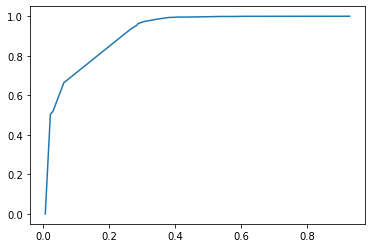

In [120]:
roc_auc_plot(yval.values, yval_pred_proba[:, 1])

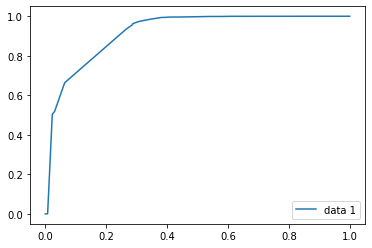

In [94]:
## SKLEARN
fpr, tpr, _ = metrics.roc_curve(yval,  yval_pred_proba[: ,1])
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()